In [1]:
# Importing required modules in Python
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn import datasets
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("Iris.csv")
df.set_index('Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.shape

(150, 5)

In [5]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Label Encoding

In [6]:
label = LabelEncoder()
df.Species = label.fit_transform(df.Species)


Iris-setosa = 0
Iris-versicolor = 1
Iris-virginica = 2

In [7]:
X = df.drop(columns="Species")
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [8]:
y=df.Species
y.head()

Id
1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: int32

# Correlation

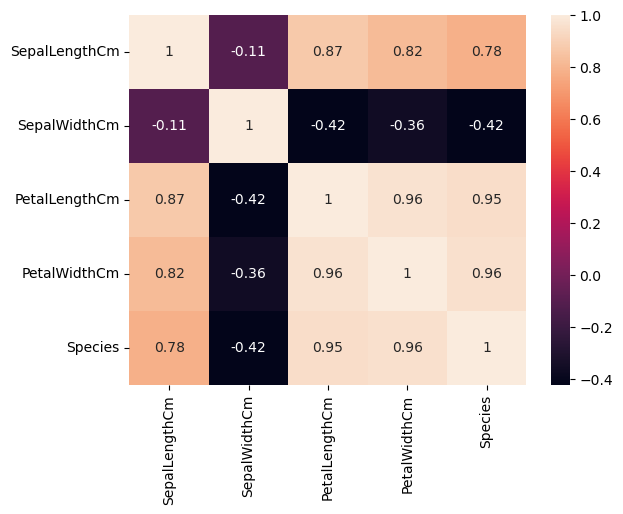

In [9]:
# Correlation between different featues
#Using Seaborn
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
#Using Pandas
corr = df.corr()
corr.style.background_gradient(cmap='viridis')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


## Training the Model


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=20,stratify=y)

In [12]:
X_train.shape

(135, 4)

In [13]:
X_test.shape

(15, 4)

# Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier()

model = dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
pred

array([1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1])

# Model Evaluation

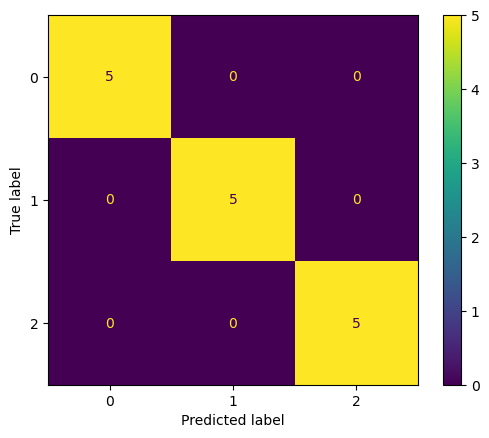

In [15]:
confusionMatrix = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,pred))
disp.plot()
plt.show()

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



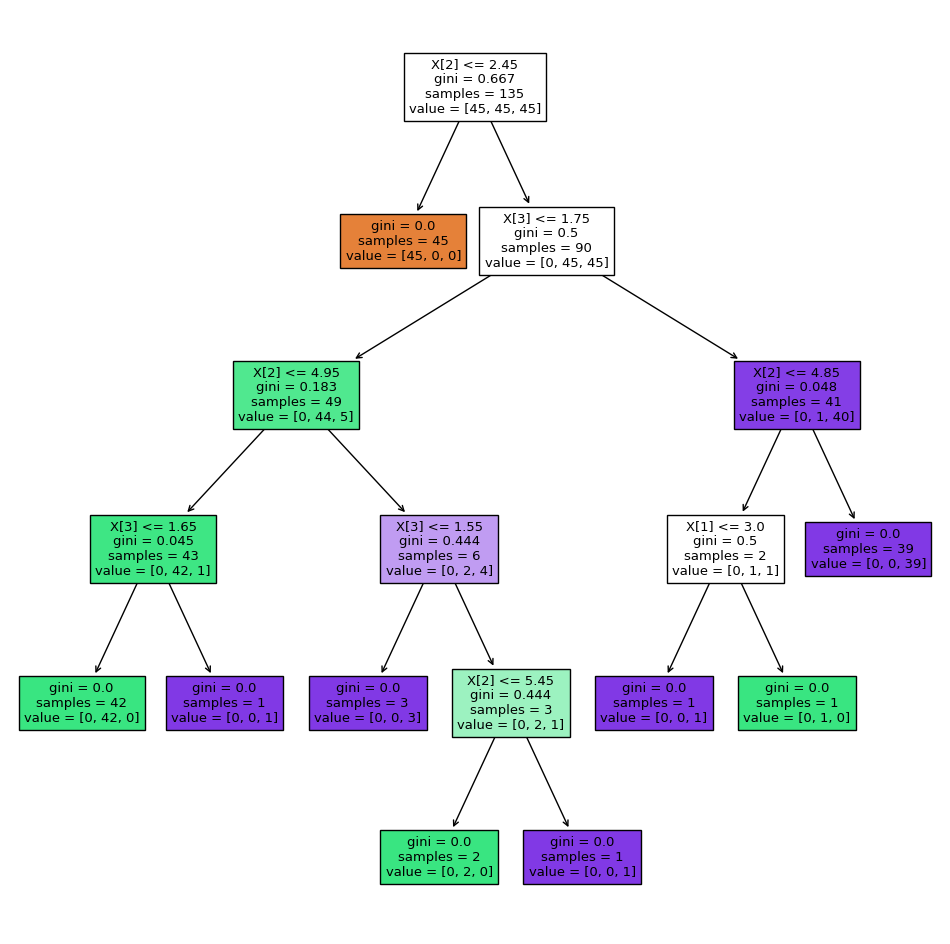

In [17]:
plt.figure(figsize=(12,12))
tree = plot_tree(model, filled=True)
plt.show()

In [18]:
print("Accuracy: ", accuracy_score(y_test, pred))

Accuracy:  1.0


# Model has accuracy 100%
# This model is deployable 